<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Análisis lineal discriminante
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se
registran las siguientes observaciones:

* `default` : Variable Binaria. Registra si el cliente entró en morosidad o no.
* `income` : Ingreso promedio declarado por el cliente.
* `balance` : total del sando en la cuenta de crédito.
* `student` : Variable binaria. Registra si el cliente es estudiante o no.

## Ejercicio 1: Preparación de ambiente de trabajo

* Importe los módulos básicos para el análisis de datos.
* Importe las clases `LabelEncoder` , `StandardScaler` y `LabelBinarizer` de `preprocessing`
* Importe las funciones `train_test_split` y `cross_val_score` de `model_selection`
* Importe la función `classification_report` de `metrics`
* Importe las clases `LinearDiscriminantAnalysis`` y QuadraticDiscriminantAnalysis` .
* Agregue la base de datos en el ambiente de trabajo.
* Inspeccione la distribución de cada atributo

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings

> Definimos algunos aspectos de ambiente y valores por defecto.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (10, 6)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
# Método para la selección de datos entre entrenamiento y test
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [9]:
# Se carga la base de datos y se elimina la columna index que no agrega valor.
df = pd.read_csv('default_credit.csv').drop(columns='index')

In [10]:
# Inspeccionamos los datos
df.sample(5)

,default,student,balance,income
6016,No,Yes,1070.639261,14833.029183
3039,No,No,697.982915,29799.319198
3243,No,No,0.000000,43513.114661
3674,No,No,521.439778,31981.858120
944,No,Yes,1468.382748,19846.064753


In [11]:
# Revisamos las dimensiones de la base de datos
df.shape

(10000, 4)

> La base de datos se compone de 10.000 observaciones con 3 atributos y el vector de clases [default]. 

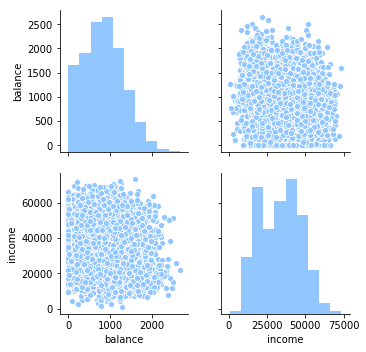

In [12]:
sns.pairplot(df)

## Ejercicio 2: Modelo base

* Recuerde que los modelos de `sklearn` no soportan datos que no sean numéricos. Transforme los atributos pertinentes con `LabelEncoder` .
* Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
* Genere un modelo con `LinearDiscriminantAnalysis` sin modificar los hiperparámetros.
* Genere métricas de evaluación utilizando `classification_report` .
* Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

> La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.

In [ ]:
plt.figure(figsize=(15,4))
df["Artis"].value_counts().plot(kind='bar', title='Canciones Registradas por Artista')

> La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

<div style='color: #854000; background-color: #ffe5e5;border-color: #ffdaff;border-radius: .25rem;padding: .75rem 1.25rem;'>
</div>